### **Problem Statement 1**

Samantha has created a dataset named <b>'top50spotify.csv'</b> of her top 50 songs from spotify.

#### **Dataset Description:** 
**top50spotify.csv** - The dataset contains 14 features. Here's a brief description of a few columns in the dataset:

*   **SerialNo.** - Serial number of songs
*   **Track.Name** - Name of the track
*   **Artist.Name** - Name of the artist
*   **Genre** - Genre of the song
*   **Energy** - Energy index of the song
*   **Length.** - Length of the song
*   **Popularity** - Popularity index of the song

#### **Tasks to be performed:**
1. Import the dataset as a DataFrame and drop the first column.
2. Save it as <b>'top50.csv'</b>.
3. Find the average <i>Energy</i> and <i>Length</i> of first 10 songs.
4. Find the total length of songs, group by genre from top to bottom.
5. Print the artist name with the most number of tracks in one genre. (Hint: Group by artist name and genre)
6. Print the data of the tracks created by the artist from the previous question.

1. Import the dataset as a DataFrame and drop the first column.

In [1]:
import pandas as pd
df=pd.read_csv('top50spotify.csv')
df.head(5)

,SerialNo.,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [2]:
df = df.drop(columns=['SerialNo.'])
df.head(5)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


2. Save it as 'top50.csv'.

In [3]:
df.to_csv('top50.csv', index=False)

3. Find the average Energy and Length of first 10 songs.

In [4]:
first_10_songs = df.head(10)
average_energy = first_10_songs['Energy'].mean()
average_length = first_10_songs['Length.'].mean()
print("Average Energy of the first 10 songs:", average_energy)
print("Average Length of the first 10 songs:", average_length)

Average Energy of the first 10 songs: 65.1
Average Length of the first 10 songs: 195.6


4. Find the total length of songs, group by genre from top to bottom. 

In [5]:
df.groupby('Genre')['Length.'].sum().sort_values(axis=0,ascending=False)

Genre
dance pop           1621
pop                 1368
latin               1126
edm                  656
reggaeton flow       611
canadian hip hop     579
panamanian pop       514
reggaeton            427
brostep              396
electropop           389
canadian pop         382
dfw rap              333
country rap          272
australian pop       210
atl hip hop          200
boy band             181
escape room          173
big room             164
r&b en espanol       162
pop house            153
trap music           131
Name: Length., dtype: int64

5. Print the artist name with the most number of tracks in one genre. (Hint: Group by artist name and genre)

In [6]:
import pandas as pd
keys=['Genre','Artist','N_Tracks']
new_df=pd.DataFrame(columns=keys)
i=0
for x,y in df.groupby(['Genre','Artist.Name']):
    new_df.loc[i]=[x[0],x[1],y['Track.Name'].count()]
    i=i+1

new_df[new_df.N_Tracks==new_df.N_Tracks.max()]

,Genre,Artist,N_Tracks
27,pop,Ed Sheeran,4


6. Print the data of the tracks created by the artist from the previous question.

In [7]:
df[df['Artist.Name']=='Ed Sheeran']

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


 ### **Problem Statement 2**
 
Write a Python program to perform the following tasks-

1. Create a pandas series from below dictionary where indices are subjects:

       {'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
       'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
       'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
       'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
       'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
        }

2. Convert the created series into DataFrame and replace the null values with zeroes.
3. Transpose the DataFrame and create a new column <b>'Average'</b> and fill the values in it by calculating the average of all subjects.

1. Create a pandas series from below dictionary where indices are subjects:

{'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
 }

In [8]:
import pandas as pd
tests={'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
       'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61}, 
       'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76}, 
       'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95}, 
       'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87} }
series=pd.Series(tests)
series=series.apply(pd.Series)
series

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,NaN,NaN,NaN,NaN
History,65.0,NaN,NaN,83.0,78.0,72.0,61.0
Geography,NaN,92.0,76.0,95.0,82.0,75.0,NaN
Mathematics,99.0,89.0,85.0,74.0,NaN,NaN,95.0
Science,89.0,NaN,87.0,NaN,93.0,82.0,78.0


2. Convert the created series into DataFrame and replace the null values with zeroes.

In [9]:
df=pd.DataFrame(series)
df=df.fillna(0)
df

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,0.0,0.0,0.0,0.0
History,65.0,0.0,0.0,83.0,78.0,72.0,61.0
Geography,0.0,92.0,76.0,95.0,82.0,75.0,0.0
Mathematics,99.0,89.0,85.0,74.0,0.0,0.0,95.0
Science,89.0,0.0,87.0,0.0,93.0,82.0,78.0


3. Transpose the DataFrame and create a new column 'Average' and fill the values in it by calculating the average of all subjects.

In [10]:
df=df.transpose()
df['Average']=df.mean(axis=1)
df

,English,History,Geography,Mathematics,Science,Average
Sam,60.0,65.0,0.0,99.0,89.0,62.6
Jackson,74.0,0.0,92.0,89.0,0.0,51.0
Ahree,85.0,0.0,76.0,85.0,87.0,66.6
Gloria,0.0,83.0,95.0,74.0,0.0,50.4
Isla,0.0,78.0,82.0,0.0,93.0,50.6
Aron,0.0,72.0,75.0,0.0,82.0,45.8
Gray,0.0,61.0,0.0,95.0,78.0,46.8


### **Problem Statement 3**

Write a Python program to create a series from 1 to 1000 and select only numbers divisible by 7 and 17.



In [11]:
import numpy as np
import pandas as pd

num1=list(range(1, 1001))

div=[num for num in num1 if num % 7 == 0 and num % 17 == 0]

series=pd.Series(div)

print("Numbers divisible by 7 and 17:")
print(series)


Numbers divisible by 7 and 17:
0    119
1    238
2    357
3    476
4    595
5    714
6    833
7    952
dtype: int64


### **Problem Statement 4**

Sylphia has a dataset of various cereals sold in the supermarket.

#### **Dataset Description:** 
**cereal.csv** - The dataset contains 16 features. Here's a brief description of 3 columns in the dataset:

*   **name** - Brand name of the cereals
*   **MFR** - Manufacturer of the brands
*   **rating** - Rating of the cereals

Syliphia wants to visualize the quality of cereals and determine which manufacturer delivers the best quality.

#### **Tasks to be performed:**
1. Import the dataset.
2. Plot ratings of different types of manufacturers.
3. Use xticks range form 0-100.
4. Change style of the graph to seaborn.

1. Import the dataset.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
cereal=pd.read_csv('cereal.csv')

2. Plot ratings of different types of manufacturers.

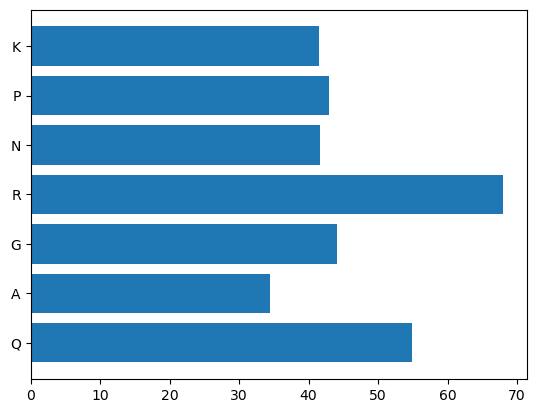

In [13]:
plt.barh(list(set(cereal.mfr)),cereal.groupby('mfr').rating.mean())
plt.show()

3. Use xticks range form 0-100.
4. Change style of the graph to seaborn.

C:\Users\King\AppData\Local\Temp\ipykernel_6804\3570300685.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


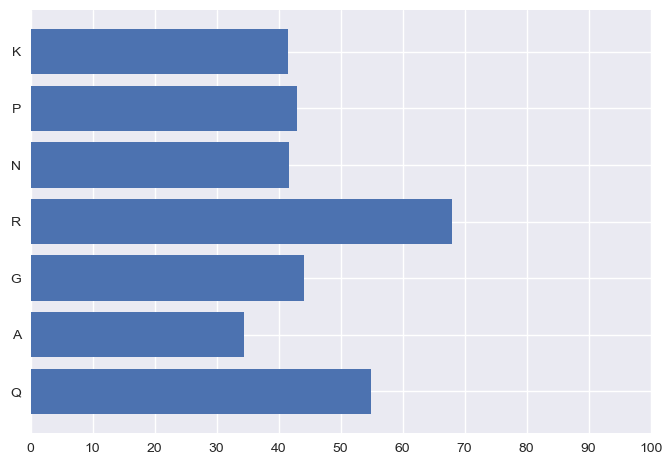

In [14]:
plt.style.use('seaborn')
plt.barh(list(set(cereal.mfr)),cereal.groupby('mfr').rating.mean())
plt.xticks(np.arange(0,101,10))
plt.show()